Allison Forte

DSC 540

Week 7 & 8 Assignment

July 27, 2022

# Data Wrangling with Python: Activity 9 (page 294)
## Extracting the top 100 eBooks from Gutenberg
Project Gutenberg encourages the creation and distribution of eBooks by encouraging volunteer efforts to digitize and archive cultural works. This activity aims to scrape the URL of Project Gutenberg's Top 100 eBooks to identify the eBooks' links. It used BeautifulSoup4 to parse the HTML and regular expression code to identify the Top 100 eBooks file numbers

1. Import the necessary libraries including regex and beautifulsoup

In [1]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

2. Check the SSL certificate

In [6]:
ctx = ssl.create_default_context()

ctx.check_hostname = False

ctx.verify_mode = ssl.CERT_NONE

3. Read the HTML from the URL

In [7]:
url = 'https://www.gutenberg.org/browse/scores/top'

response = requests.get(url)

response

<Response [200]>

4. Write a small function to check the status of the web request

In [9]:
def status_check(r):
    if r.status_code == 200:
        print('Success!')
        return 1
    else:
        print('Failed!')
        return -1
    

status_check(response)

Success!


1

5. Decode the response and pass this on to BeautifulSoup for HTML parsing

In [11]:
contents = response.content.decode(response.encoding)

soup = BeautifulSoup(contents, 'html.parser')

soup  # Look at soup to see structure

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Top 100 | Project Gutenberg</title>
<link href="/gutenberg/style.css?v=1.1" rel="stylesheet"/>
<link href="/gutenberg/collapsible.css?1.1" rel="stylesheet"/>
<link href="/gutenberg/new_nav.css?v=1.321231" rel="stylesheet"/>
<link href="/gutenberg/pg-desktop-one.css" rel="stylesheet"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="books, ebooks, free, kindle, android, iphone, ipad" name="keywords">
<meta content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io" name="google-site-verification"/>
<meta content="4WNaCljsE-A82vP_ih2H_UqXZvM" name="alexaVerifyID"/>
<link href="https://www.gnu.org/copyleft/fdl.html" rel="copyright">
<link href="/gutenberg/favicon.ico?v=1.1" rel="shortcut icon">
<meta content="Project Gutenberg" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.gutenberg.org/" property="og:url"/>
<m

6. Find all the herf tags and store them in the list of links. Check what the list looks like - print the first 30 elements

In [31]:
#  Create a list for the links

links=[]


#  Find the href tags and add them to the list

for link in soup.find_all('a'):
    links.append(link.get('href'))
    

#   Print the first 50 elements in the list (to find where the correct links start)

number = 0
for link in links[:50]:
    print('link number', number,':', link)
    number = number + 1

link number 0 : /
link number 1 : /about/
link number 2 : /about/
link number 3 : /policy/collection_development.html
link number 4 : /about/contact_information.html
link number 5 : /about/background/
link number 6 : /policy/permission.html
link number 7 : /policy/privacy_policy.html
link number 8 : /policy/terms_of_use.html
link number 9 : /ebooks/
link number 10 : /ebooks/
link number 11 : /ebooks/bookshelf/
link number 12 : /browse/scores/top
link number 13 : /ebooks/offline_catalogs.html
link number 14 : /help/
link number 15 : /help/
link number 16 : /help/copyright.html
link number 17 : /help/errata.html
link number 18 : /help/file_formats.html
link number 19 : /help/faq.html
link number 20 : /policy/
link number 21 : /help/public_domain_ebook_submission.html
link number 22 : /help/submitting_your_own_work.html
link number 23 : /help/mobile.html
link number 24 : /attic/
link number 25 : /donate/
link number 26 : /donate/
link number 27 : #books-last1
link number 28 : #authors-las

7. Use regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks

8. Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numberic digits in the link href string. Use the findall method.

In [30]:
#  Create a list for the book numbers

booknum = []


#  Iterate through links list to find the intergers

for link in range(33,33+100):  #  Links with top 100 start at number 33 as seen above
    link = links[link]
    link = link.strip()
    n = re.findall('[0-9]+',link)  #  Find the numeric digits in the link
    if len(n) == 1:
        booknum.append(int(n[0]))  #  Add the integer file number to the book number list

        
#  Print the file numbers for each top book

book_num = 1

for file_num in booknum:
    print ('The file number for book number', book_num, 'is', file_num)
    book_num = book_num + 1


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
The file number for book number 1 is 1342
The file number for book number 2 is 1661
The file number for book number 3 is 11
The file number for book number 4 is 105
The file number for book number 5 is 84
The file number for book number 6 is 2701
The file number for book number 7 is 345
The file number for book number 8 is 1184
The file number for book number 9 is 174
The file number for book number 10 is 98
The file number for book number 11 is 68604
The file number for book number 12 is 33283
The file number for book number 13 is 68609
The file number for book number 14 is 2600
The file number for book number 15 is 4300
The file number for book number 16 is 1952
The file number for book number 17 is 5200
The file number for book number 18 is 2554
The file number for book number 19 is 1400
The file number for book number 20 is 2591
The file numbe

9. What does the soup object's text look like? Use the .text method and print only the first 2000 characters (do not print the whole thing as it is too long)

In [32]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-07-25155252
last 7 days1027200
last 30 days4375127



Top 100 EBooks yesterd

10. Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking)

In [71]:
# Create a list for book names

titles = []

11. Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object

In [72]:
start = soup.text.splitlines().index('Top 100 EBooks yesterday')

12. Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method

In [73]:
for line in range(100):
    titles.append(soup.text.splitlines()[start+10+line])  #  Top 100 ebooks yesterday appears twice so add 10 

13. Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them

In [74]:
#  Create an empty list for the final titles

final_titles=[]


for i in range(100):
    id1,id2=re.match('^[a-zA-ZÀ-ÿ:;,\-\.\'金雲翹傳 ]*', titles[i]).span()
    final_titles.append(titles[i][id1:id2])

    
title_num = 1

for l in lst_titles:
    print(title_num, ':', l)
    title_num = title_num + 1

1 : Pride and Prejudice by Jane Austen 
2 : The Adventures of Sherlock Holmes by Arthur Conan Doyle 
3 : Alice's Adventures in Wonderland by Lewis Carroll 
4 : Persuasion by Jane Austen 
5 : Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley 
6 : Moby Dick; Or, The Whale by Herman Melville 
7 : Dracula by Bram Stoker 
8 : The Count of Monte Cristo, Illustrated by Alexandre Dumas 
9 : The Picture of Dorian Gray by Oscar Wilde 
10 : A Tale of Two Cities by Charles Dickens 
11 : Europe and elsewhere by Mark Twain 
12 : Calculus Made Easy by Silvanus P.  Thompson 
13 : Skylark of Valeron by E. E.  Smith 
14 : War and Peace by graf Leo Tolstoy 
15 : Ulysses by James Joyce 
16 : The Yellow Wallpaper by Charlotte Perkins Gilman 
17 : Metamorphosis by Franz Kafka 
18 : Crime and Punishment by Fyodor Dostoyevsky 
19 : Great Expectations by Charles Dickens 
20 : Grimms' Fairy Tales by Jacob Grimm and Wilhelm Grimm 
21 : Anna Karenina by graf Leo Tolstoy 
22 : A Modest Proposa

# Data Wrangling with Python: Activity 10 (page 295)
## Building your own movie database by reading an API


1. Import urlliib.request, urllib.parse, urllib.error, and json

In [194]:
import urllib.request, urllib.parse, urllib.error
import json

2. Obtain a key and store it in a file
3. Load the secret API key

In [195]:
with open('/Users/allison.forte/Downloads/API keys') as f:
    api_keys = f.readlines()
    api_key = api_keys[1]

5. Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable

In [196]:
serviceurl = 'http://www.omdbapi.com/?'

6. Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where sectetapikey is your own API key)

In [197]:
apikey = '&apikey=' + api_key

7. Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal)

In [198]:
def print_json(json_data):
    list_keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("*"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("*"*50)


8. Write a utility function to download a poster of the movie based on the information from the jason dataset and save in your local folder

+ Use os module
+ The poster data is stored in the JSON key 'Poster'
+ You may want to split the name of the Poster file and extract the file extension only. Let's say the extension is 'jpg'.
+ Then later join this extension to the movie name and create a filename like movie.jpg
+ Use the Python command open to open a file and write the poster data. Close the file after done.
+ This function may not return anything. It just saves the poster data as an image file.

In [208]:
def save_poster(json_data):
    import os
    title = json_data['Title']  # Creates a title
    poster_url = json_data['Poster']  # Gets the URL from JSON data
    file_ext = poster_url.split('.')[-1]  # Creates the file extension by splitting the url and taking the final split
    poster_data = urllib.request.urlopen(poster_url).read()  # Reads the image from the URL
        
    savelocation = os.getcwd()+'/'+'Posters'+'/'  # Designates where to save the poster
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)  # Creates the save location if it does not exist
    
    filename = savelocation + str(title) + '.' + file_ext
    f = open(filename,'wb')  # Opens the file
    f.write(poster_data)  # Creates a saved file
    f.close()  # Closes the opened web file
    return(filename)

9. Write a utility function search_movie to search a movie by its name, print the downloaded JSON data (use the print_json function for this) and save the movie poster in the local folder (use save_poster function for this)

+ Use try-except loop for this i.e. try to connect to the web portal, if successful proceed but if not (i.e. exception raised) then just print an error message
+ Here use the previously created variables serviceurl and apikey
+ You have to pass on a dictionary with a key t and the movie name as the corresponding value to urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL
+ This URL will be used for accessing the data
+ The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.

In [210]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving data for "{title}".')  # Let the user know the search is working
        uh = urllib.request.urlopen(url)  # Accessing the API
        data = uh.read()  # Data received from the API
        json_data = json.loads(data)  # Read the JSON data 
        
        if json_data['Response'] == 'True':
            print_json(json_data)
            if json_data['Poster']!= 'N/A':
                location = save_poster(json_data)  # Saves poster if available using save_poster function
                print('Poster saved to', location)  # Tells user if poster was saved
        else:
            print("Error encountered: ",json_data['Error'])  # Informs user of error
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")  # Displays error if the request is not successful

10. Test the search_movie function by entering Titanic

In [211]:
search_movie("Titanic")

Retrieving data for "Titanic".
**************************************************
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,147,994
imdbID: tt0120338
**************************************************
Poster saved to /Users/allison.forte/Posters/Titanic.jpg


11. Test the search_movie function by entering 'Random_error' (obviously this will not be found, and you should be able to check whether your error catching code is working properly)

In [212]:
search_movie("Random_error")

Retrieving data for "Random_error".
Error encountered:  Movie not found!


# Using one of the datasets provided, or a dataset of your own, choose 3 of the following visualizations to complete. 
Plot histogram, bar chart, and pie chart for candy data from last week's assignment.

In [160]:
#  Load packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [171]:
#  Use candy data set from weeks 5 and 6

df = pd.read_excel('/Users/allison.forte/Downloads/Weeks 5 & 6 Data/candyhierarchy2017.xlsx')
df.head

/Users/allison.forte/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<bound method NDFrame.head of       Internal ID Q1: GOING OUT? Q2: GENDER Q3: AGE Q4: COUNTRY  \
0        90258773            NaN        NaN     NaN         NaN   
1        90272821             No       Male      44        USA    
2        90272829            NaN       Male      49         USA   
3        90272840             No       Male      40          us   
4        90272841             No       Male      23         usa   
...           ...            ...        ...     ...         ...   
2455     90314359             No       Male      24         USA   
2456     90314580             No     Female      33         USA   
2457     90314634             No     Female      26        USA    
2458     90314658             No       Male      58         Usa   
2459     90314802             No     Female      66         usa   

     Q5: STATE, PROVINCE, COUNTY, ETC Q6 | 100 Grand Bar  \
0                                 NaN                NaN   
1                                  NM        

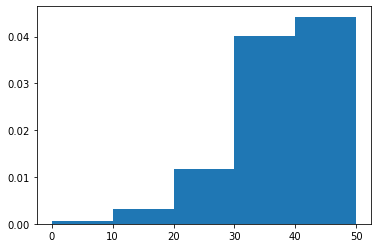

In [172]:
#  Change age into numeric values

df['Q3: AGE'] = pd.to_numeric(df['Q3: AGE'], errors='coerce')


#  Plot a histogram of ages ini this dataframe

plt.hist(df['Q3: AGE'], bins = [0, 10, 20, 30, 40, 50], density = True)
plt.show()

# plot
#fig, ax = plt.subplots()
#df['Q3: AGE'] = pd.to_numeric(df['Q3: AGE'], errors='coerce')
#df['Q3: AGE'].plot()
#y = df['Q3: AGE'].count
    
#ax.bar(x, y)

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
 #      ylim=(0, 8), yticks=np.arange(1, 8))

#plt.show()

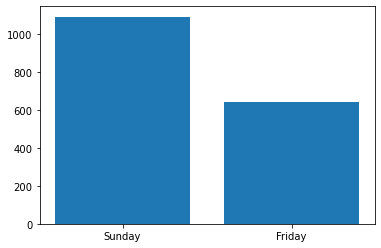

In [176]:
#  Plot a bar chart of 'Q11: DAY' to see which day is most common

df.dropna(subset = ['Q11: DAY'], inplace = True)  #  Drop na values


#  Plot counts of each value in column and unique answers in column

plt.bar(pd.unique(df['Q11: DAY']), df['Q11: DAY'].value_counts())
plt.show()

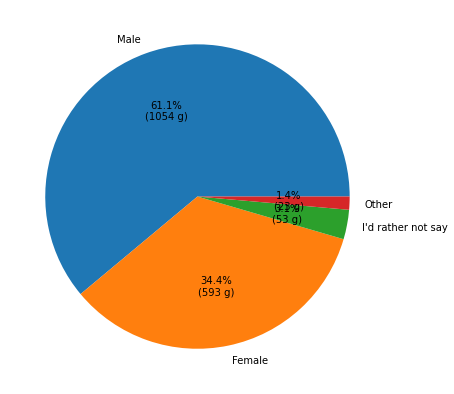

In [183]:
#  Pie chart showing breakdown of genders in the dataframe

df.dropna(subset = ['Q2: GENDER'], inplace = True)  #  Drop NA values


def func(pct, allvalues):  #  Function to create percent
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

fig = plt.figure(figsize =(10, 7))
plt.pie(df['Q2: GENDER'].value_counts(), autopct = lambda pct: func(pct, gender_count), labels = pd.unique(df['Q2: GENDER']))
plt.show()